Import Library

In [108]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

Import dataset dan menampilkan info dataset

In [109]:
df=pd.read_csv('drive/MyDrive/Bengkod/UAS/ObesityDataSet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Rename kolom

In [110]:
df.columns=['age','gender','height','weight','alcohol','calories','vegetables','eat/day','cal/day','smoke','water','carrier','physical','gadget','snack','transport','obesity']
df.head(10)

,age,gender,height,weight,alcohol,calories,vegetables,eat/day,cal/day,smoke,water,carrier,physical,gadget,snack,transport,obesity
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
5,29,Male,1.62,53,Sometimes,yes,2,3,no,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
6,23,Female,1.5,55,Sometimes,yes,3,3,no,no,2,yes,1,0,Sometimes,Motorbike,Normal_Weight
7,22,Male,1.64,53,Sometimes,no,2,3,no,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
8,24,Male,1.78,348.49777557852735,Frequently,yes,3,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight
9,22,Male,1.72,68,no,yes,2,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight


Jumlah data kosong pada masing-masing kolom

In [112]:
df.isnull().sum()

,0
age,14
gender,9
height,12
weight,11
alcohol,5
calories,11
vegetables,8
eat/day,12
cal/day,10
smoke,5


Mengubah ? menjadi NaN

In [113]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
df.replace("?", py.nan, inplace=True)
df.isnull().sum()

,0
age,22
gender,22
height,22
weight,19
alcohol,20
calories,22
vegetables,18
eat/day,22
cal/day,18
smoke,13


Drop kolom yang memiliki data kosong

In [114]:
df.dropna(inplace=True)
df.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
alcohol,0
calories,0
vegetables,0
eat/day,0
cal/day,0
smoke,0


Jumlah data unik pada kolom

In [115]:
print(df.nunique())

age           1215
gender           2
height        1361
weight        1321
alcohol          4
calories         2
vegetables     702
eat/day        551
cal/day          2
smoke            2
water         1097
carrier          2
physical      1032
gadget         973
snack            4
transport        5
obesity          7
dtype: int64


Jumlah data duplikat

In [116]:
dupe=df.duplicated().sum()
print("Duplikat = ",dupe)

Duplikat =  18


Hapus kolom yang duplikat

In [117]:
df.drop_duplicates(inplace=True)
dupe=df.duplicated().sum()
print("Duplikat = ",dupe)

Duplikat =  0


Distribusi data pada kolom obesity

Distribusi Kelas:
obesity
Obesity_Type_I         314
Obesity_Type_III       270
Obesity_Type_II        250
Normal_Weight          247
Overweight_Level_II    243
Overweight_Level_I     240
Insufficient_Weight    229
Name: count, dtype: int64


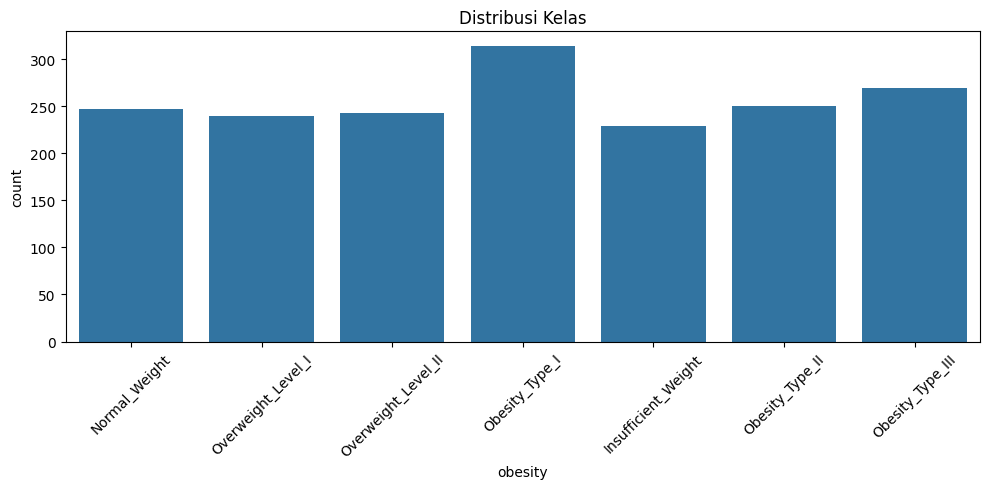

In [118]:
print("Distribusi Kelas:")
print(df['obesity'].value_counts())

plt.figure(figsize=(10, 5))  # Optional: buat plot lebih lebar
sns.countplot(data=df, x='obesity')

plt.title('Distribusi Kelas')
plt.xticks(rotation=45)  # Putar label sumbu X sebesar 45 derajat
plt.tight_layout()       # Supaya layout tidak mepet
plt.show()

Ubah tipe data kolom yang memiliki data numerik

In [119]:
for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')
    except ValueError:
        pass
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1793 non-null   float64
 1   gender      1793 non-null   object 
 2   height      1793 non-null   float64
 3   weight      1793 non-null   float64
 4   alcohol     1793 non-null   object 
 5   calories    1793 non-null   object 
 6   vegetables  1793 non-null   float64
 7   eat/day     1793 non-null   float64
 8   cal/day     1793 non-null   object 
 9   smoke       1793 non-null   object 
 10  water       1793 non-null   float64
 11  carrier     1793 non-null   object 
 12  physical    1793 non-null   float64
 13  gadget      1793 non-null   float64
 14  snack       1793 non-null   object 
 15  transport   1793 non-null   object 
 16  obesity     1793 non-null   object 
dtypes: float64(8), object(9)
memory usage: 252.1+ KB


Ubah tipe data kolom yang memiliki data kategori

In [120]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1793 non-null   float64
 1   gender      1793 non-null   int64  
 2   height      1793 non-null   float64
 3   weight      1793 non-null   float64
 4   alcohol     1793 non-null   int64  
 5   calories    1793 non-null   int64  
 6   vegetables  1793 non-null   float64
 7   eat/day     1793 non-null   float64
 8   cal/day     1793 non-null   int64  
 9   smoke       1793 non-null   int64  
 10  water       1793 non-null   float64
 11  carrier     1793 non-null   int64  
 12  physical    1793 non-null   float64
 13  gadget      1793 non-null   float64
 14  snack       1793 non-null   int64  
 15  transport   1793 non-null   int64  
 16  obesity     1793 non-null   int64  
dtypes: float64(8), int64(9)
memory usage: 252.1 KB


Menampilkan outliers pada masing-masing kolom

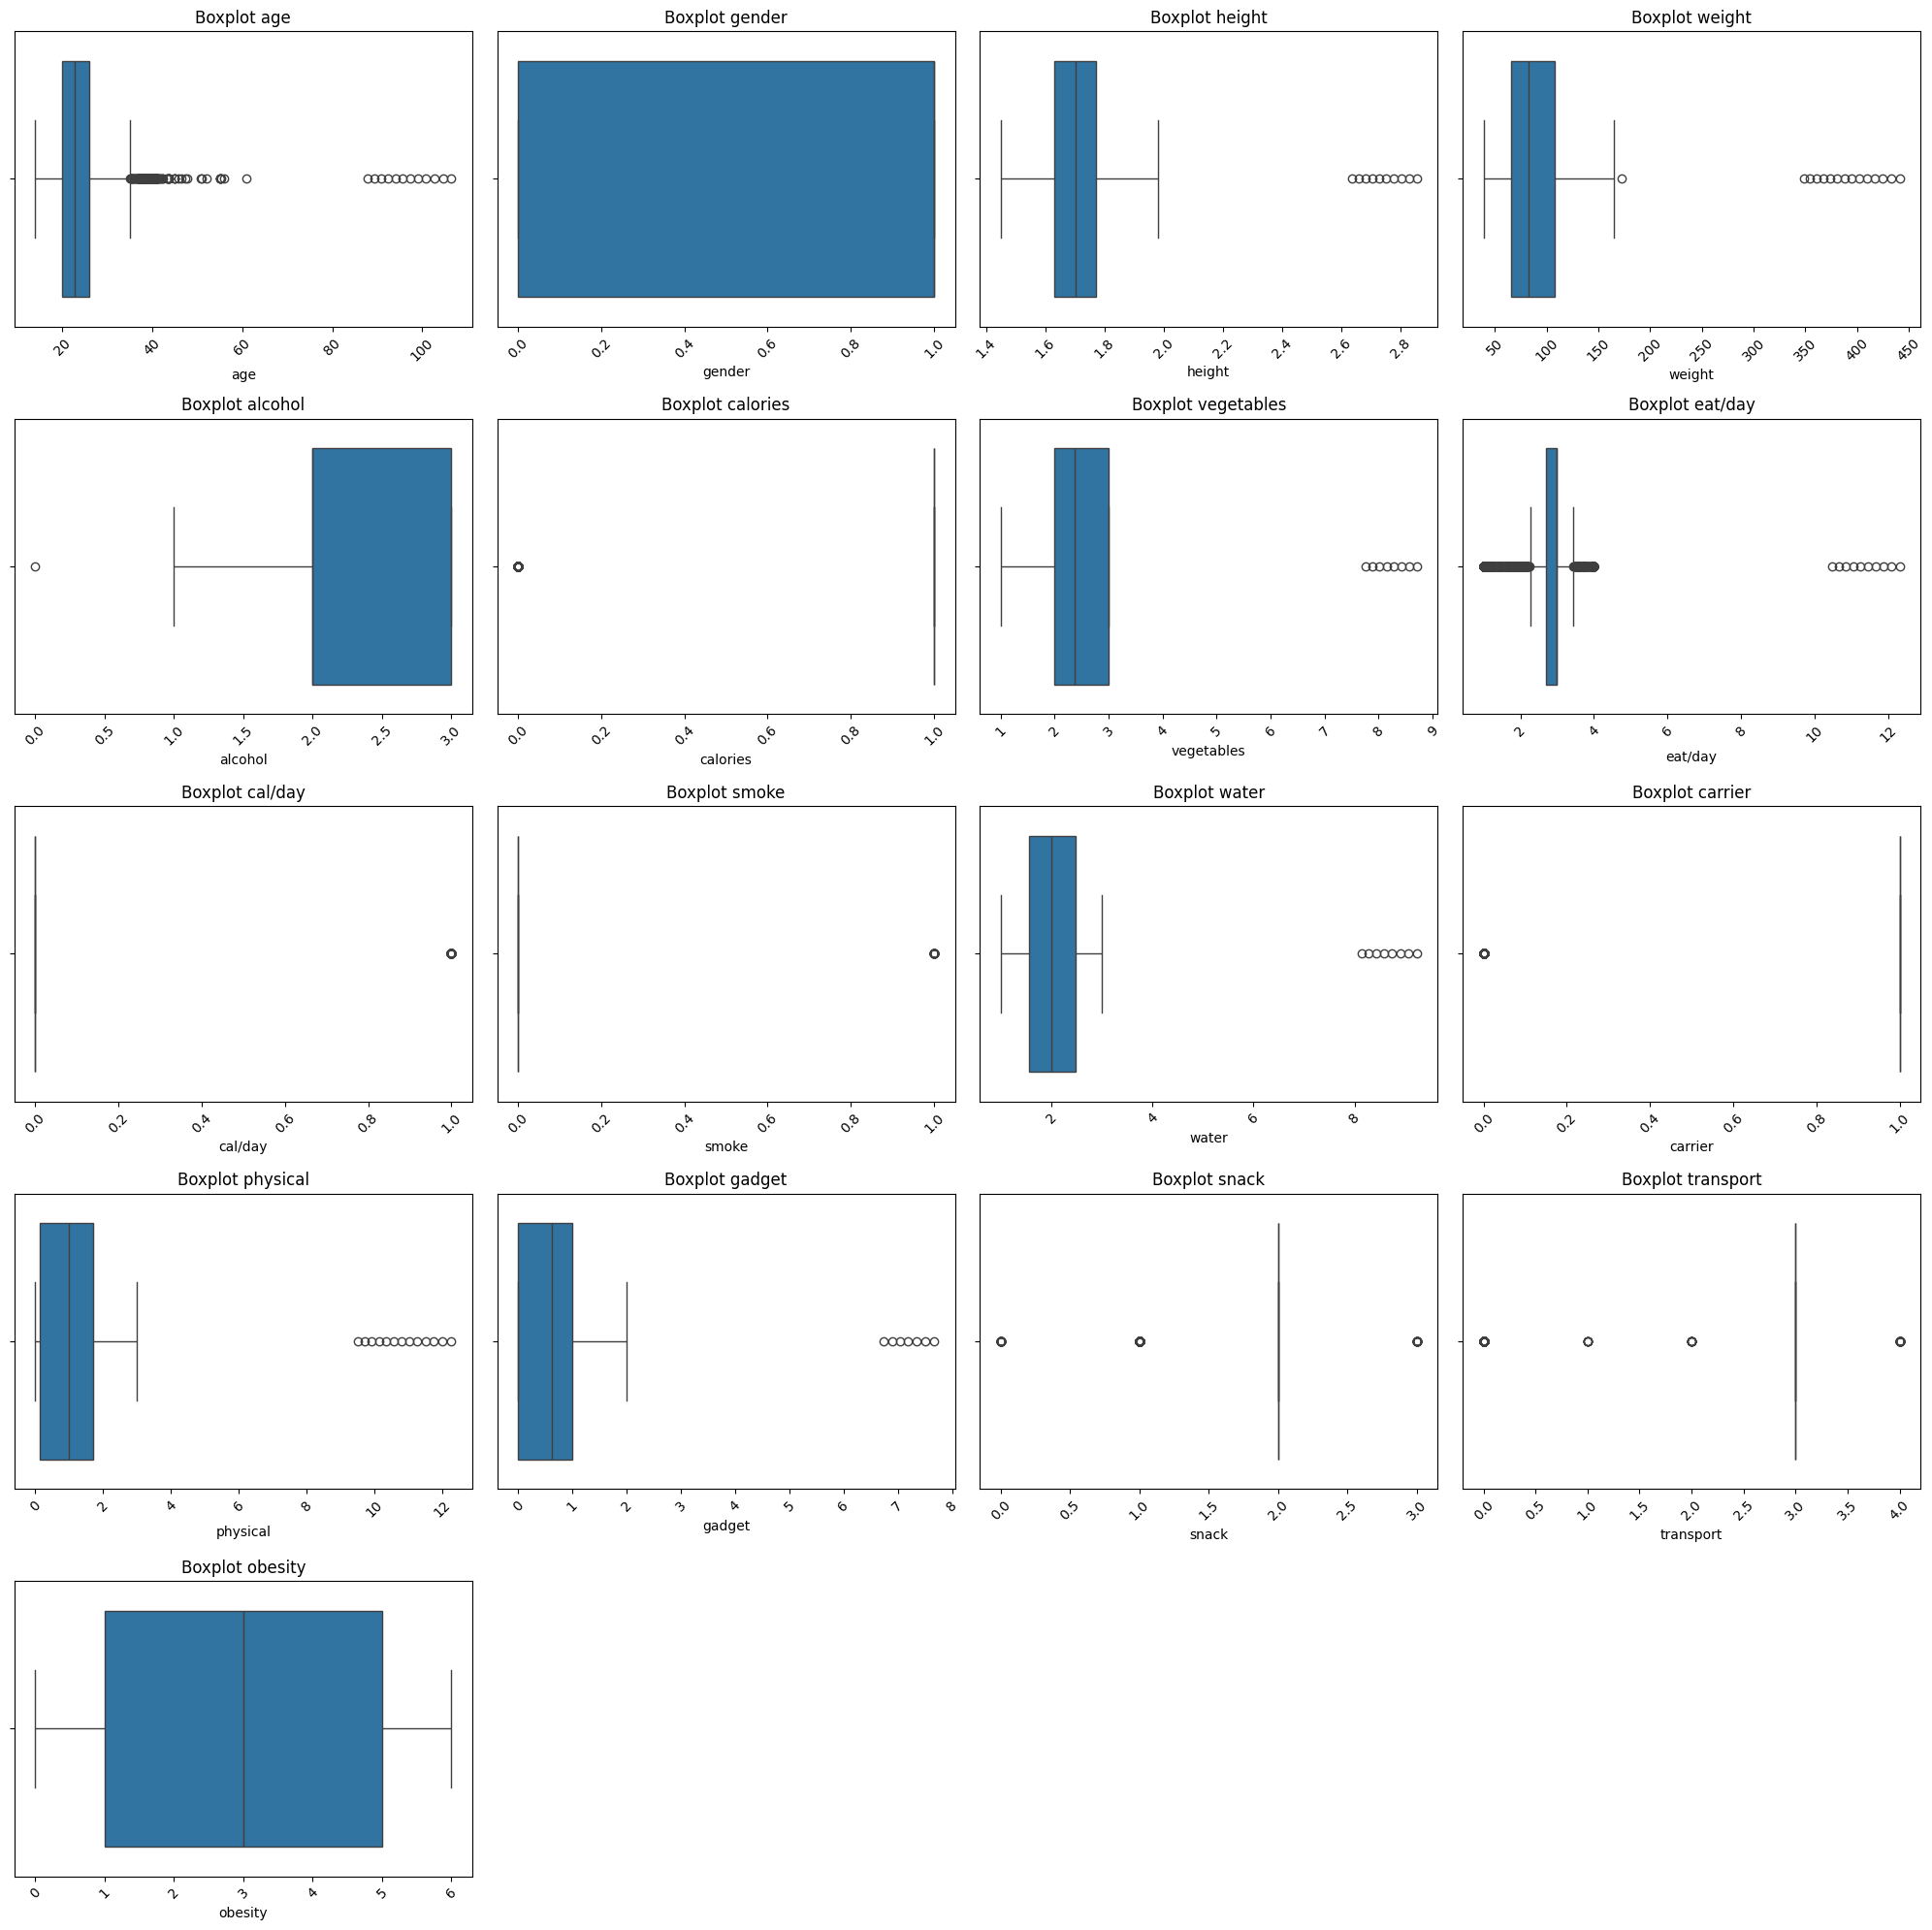

In [121]:
# Ambil kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Tentukan jumlah kolom dan ukuran grid (misal: 3 kolom per baris)
n_cols = 4
n_plots = len(numeric_cols)
n_rows = math.ceil(n_plots / n_cols)

# Buat grid subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # agar bisa diakses dengan 1D index

# Loop dan buat boxplot di tiap subplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
